In [90]:
# Importation des bibliothèques colab
from google.colab import drive
from google.colab import files

In [91]:
#Accès à Google Drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [92]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection, metrics, preprocessing, feature_extraction, cluster)
from sklearn.cluster import (KMeans, DBSCAN)
from sklearn.cluster import AgglomerativeClustering
from matplotlib import offsetbox
from matplotlib.image import imread
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
import random
import datetime
from datetime import timedelta
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install opencv-contrib-python==4.4.0.44
import time
import cv2
#from keras.application.vgg16 import (VGG16, preprocess_input,decode_predictions)
#from keras.preprocessing.image import (load_img, img_to_array)
from sklearn import ensemble

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
print(cv2.__version__)

4.4.0


In [94]:
# Affichage de toutes les colonnes et lignes lorsque demandé
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [95]:
# Importation des données textes
dataText = pd.read_csv('/gdrive/My Drive/Data/p6data/flipkart_com-ecommerce_sample_1050.csv')

In [96]:
# Suite à de nombreux essais, l'observation 677 provoque systématiquement un dépassement de la RAM disponible sur l'algorithme SIFT, elle est donc retirée de l'échantillon
dataText.drop(labels=677, inplace=True)

# Exploration et préparation du jeu de données textuelles

In [97]:
dataText.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


7b72c92c2f6c40268628ec5f14c6d590

2016-04-30 03:22:56 +0000

http://www.flipkart.com/sathiyas-cotton-bath-towel/p/itmegfzhxbyucwgn?pid=BTWEGFZHGBXPHZUH

Sathiyas Cotton Bath Towel

["Baby Care >> Baby Bath & Skin >> Baby Bath Towels >> Sathiyas Baby Bath Towels >> Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Y..."]

BTWEGFZHGBXPHZUH

600.0

449.0

7b72c92c2f6c40268628ec5f14c6d590.jpg

False

Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel

No rating available

No rating available

Sathiyas

{"product_specification"=>[{"key"=>"Machine Washable", "value"=>"Yes"}, {"key"=>"Material", "value"=>"Cot

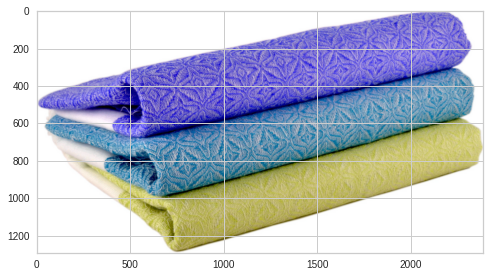

In [98]:
# Présentation des caractéristiques de la première observation
dataText.columns
for col in dataText.columns :
  print(dataText[col][1])
  print('')
# Affichage de l'image du premier produit
path = "/gdrive/My Drive/Data/p6data/Images/"
image = cv2.imread(path+dataText['image'][1], -1)
plt.imshow(image)

Le forme du dataframe est (1049, 15)
Colonne : uniq_id : 0 valeurs manquantes, ratio : 0.0
Colonne : crawl_timestamp : 0 valeurs manquantes, ratio : 0.0
Colonne : product_url : 0 valeurs manquantes, ratio : 0.0
Colonne : product_name : 0 valeurs manquantes, ratio : 0.0
Colonne : product_category_tree : 0 valeurs manquantes, ratio : 0.0
Colonne : pid : 0 valeurs manquantes, ratio : 0.0
Colonne : retail_price : 1 valeurs manquantes, ratio : 0.0
Colonne : discounted_price : 1 valeurs manquantes, ratio : 0.0
Colonne : image : 0 valeurs manquantes, ratio : 0.0
Colonne : is_FK_Advantage_product : 0 valeurs manquantes, ratio : 0.0
Colonne : description : 0 valeurs manquantes, ratio : 0.0
Colonne : product_rating : 0 valeurs manquantes, ratio : 0.0
Colonne : overall_rating : 0 valeurs manquantes, ratio : 0.0
Colonne : brand : 338 valeurs manquantes, ratio : 0.32
Colonne : product_specifications : 1 valeurs manquantes, ratio : 0.0
Le data frame comprends 341 valeurs manquantes au total soit un 

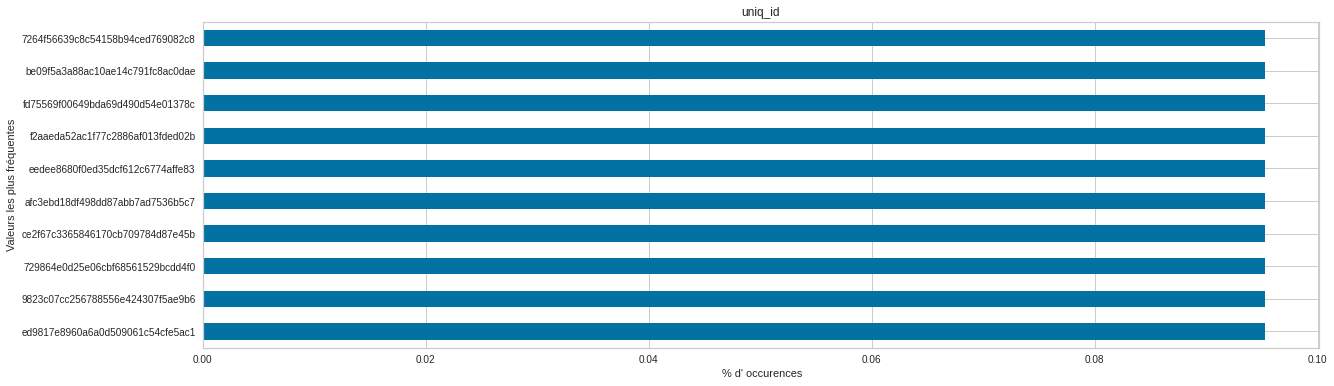

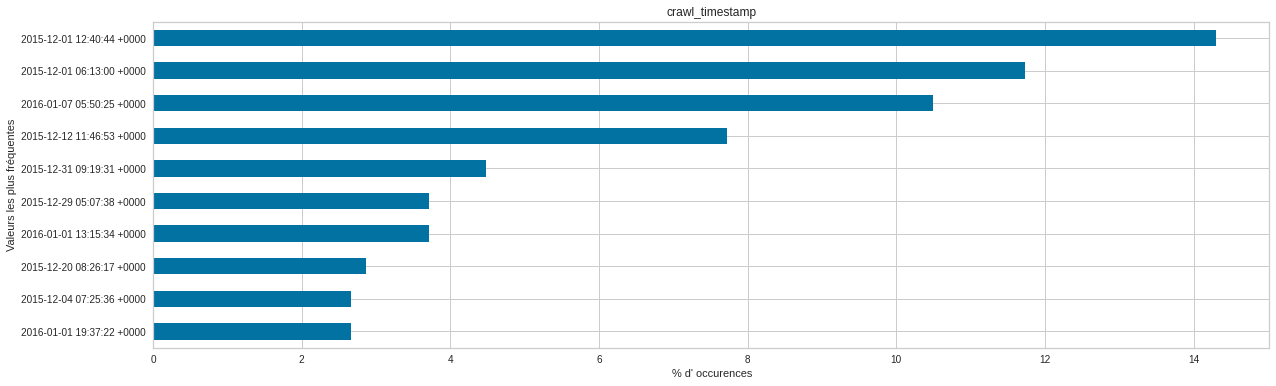

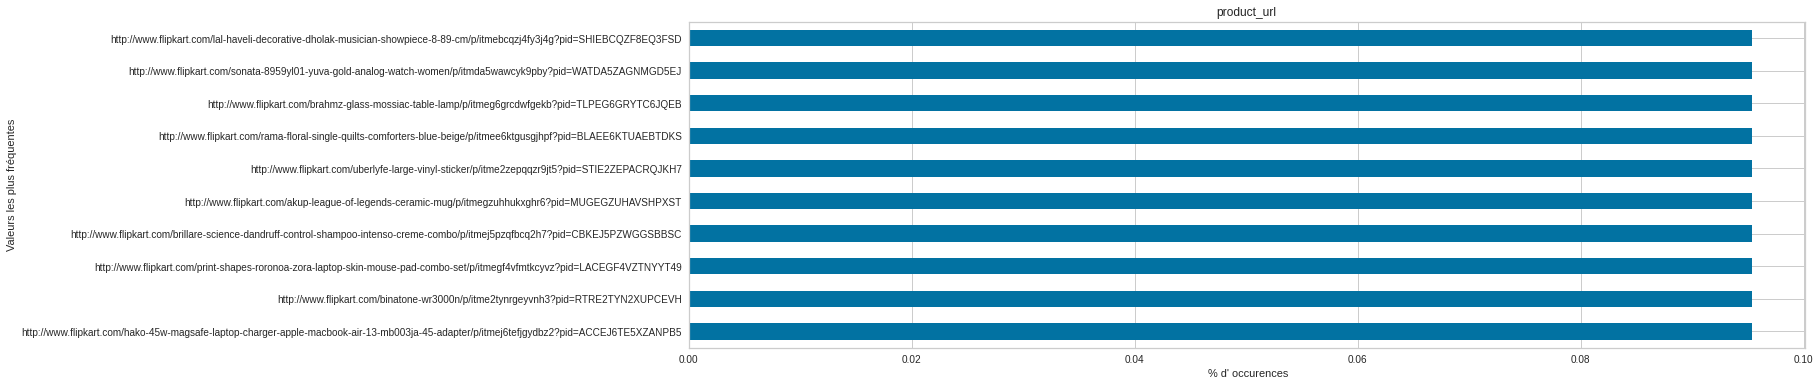

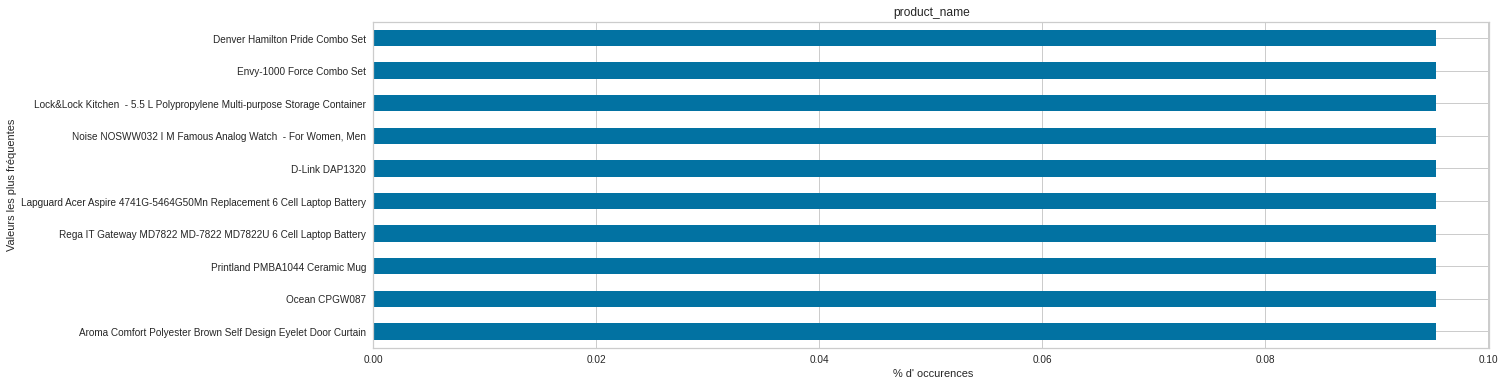

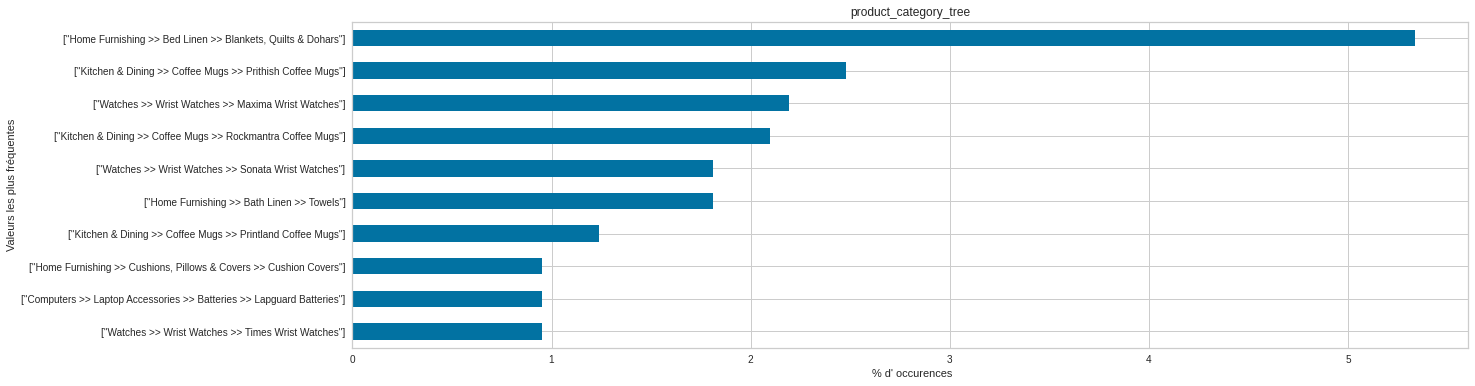

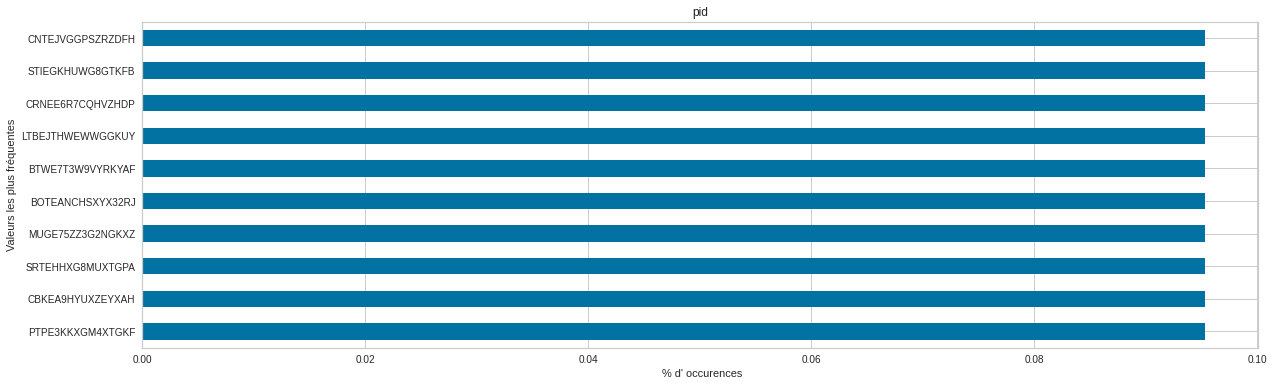

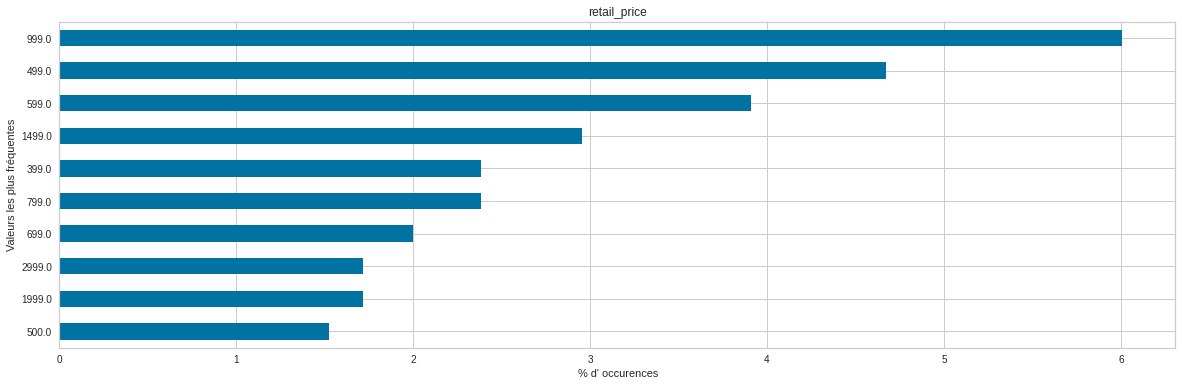

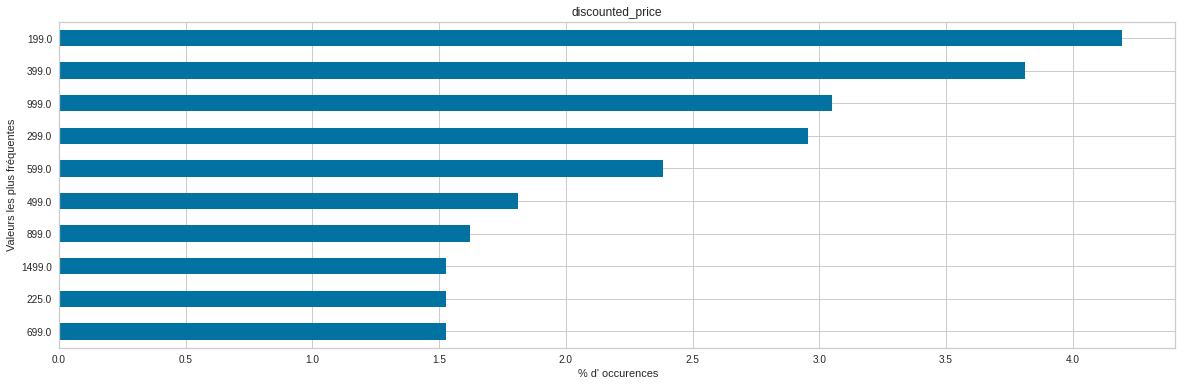

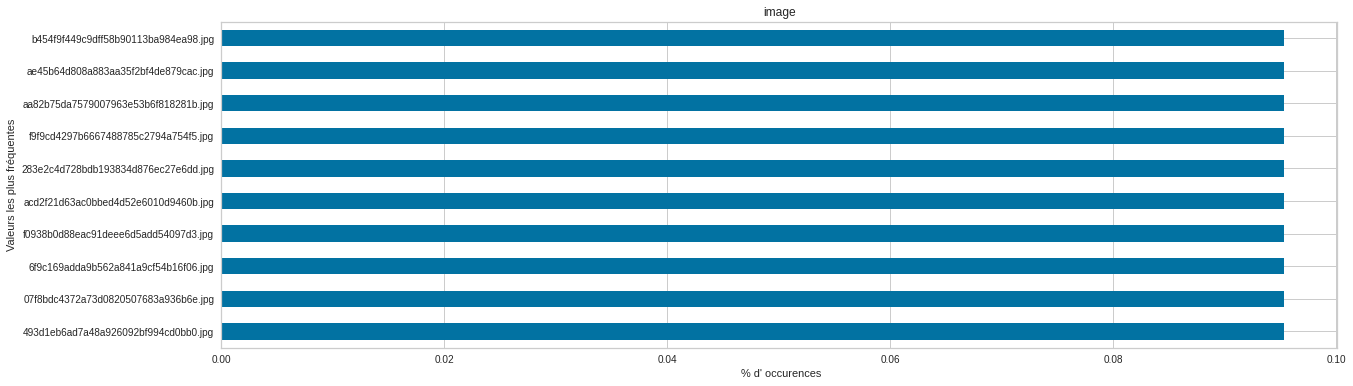

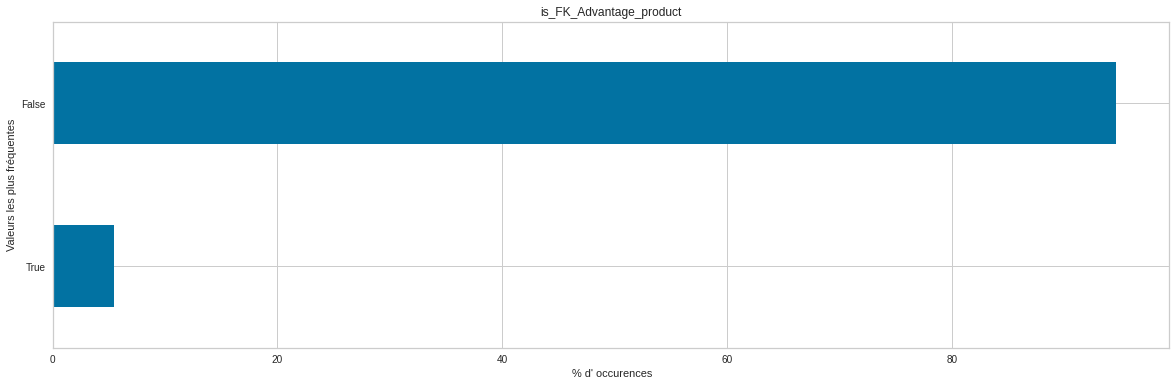

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


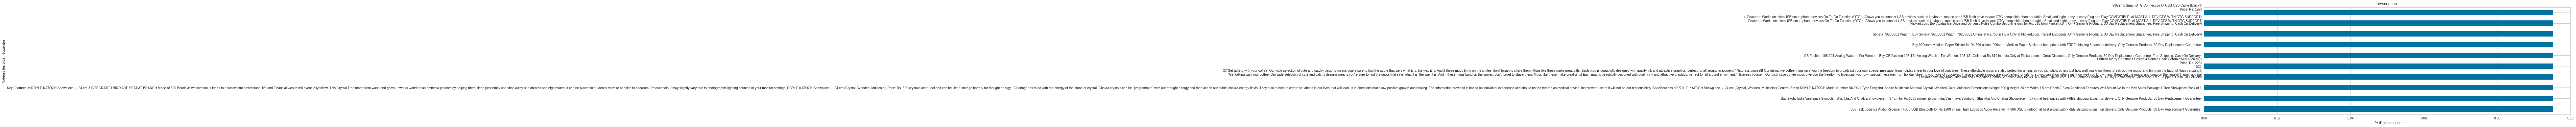

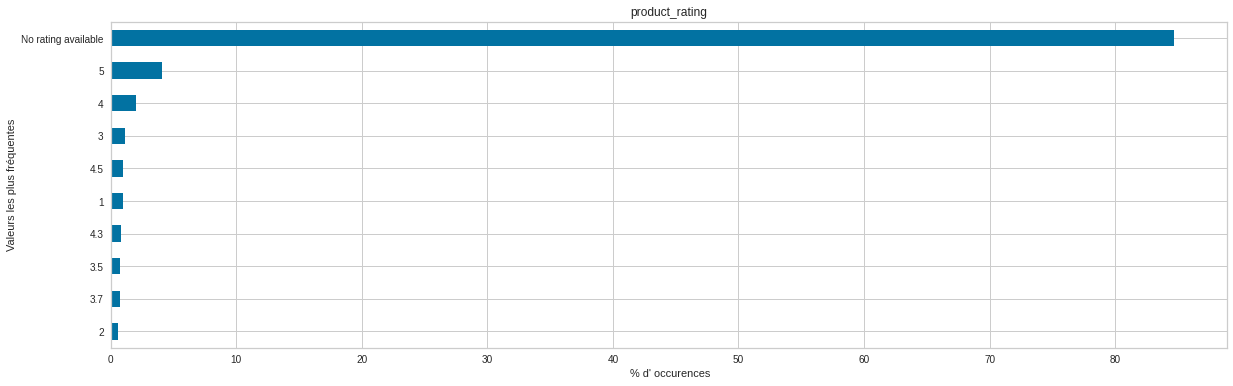

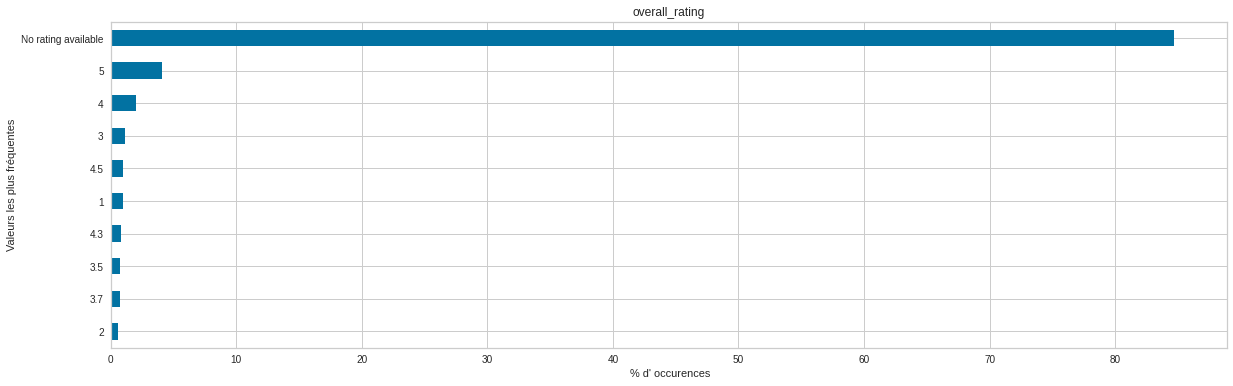

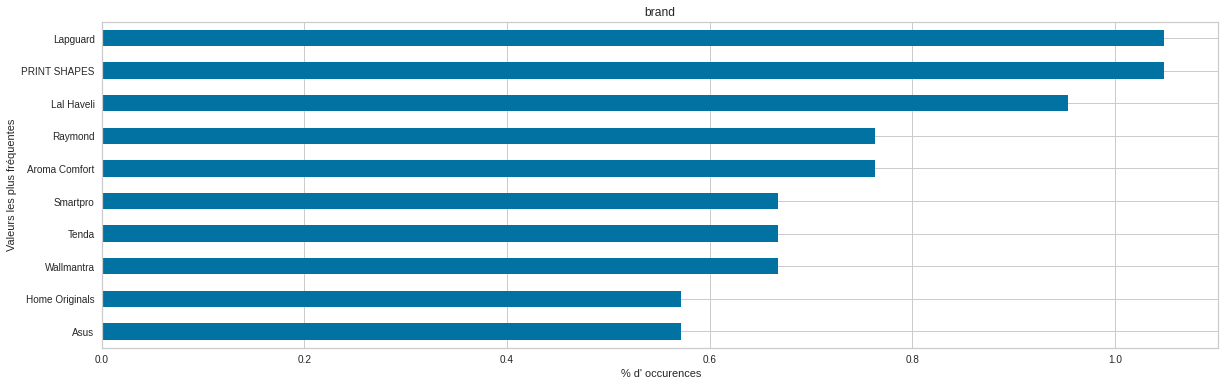

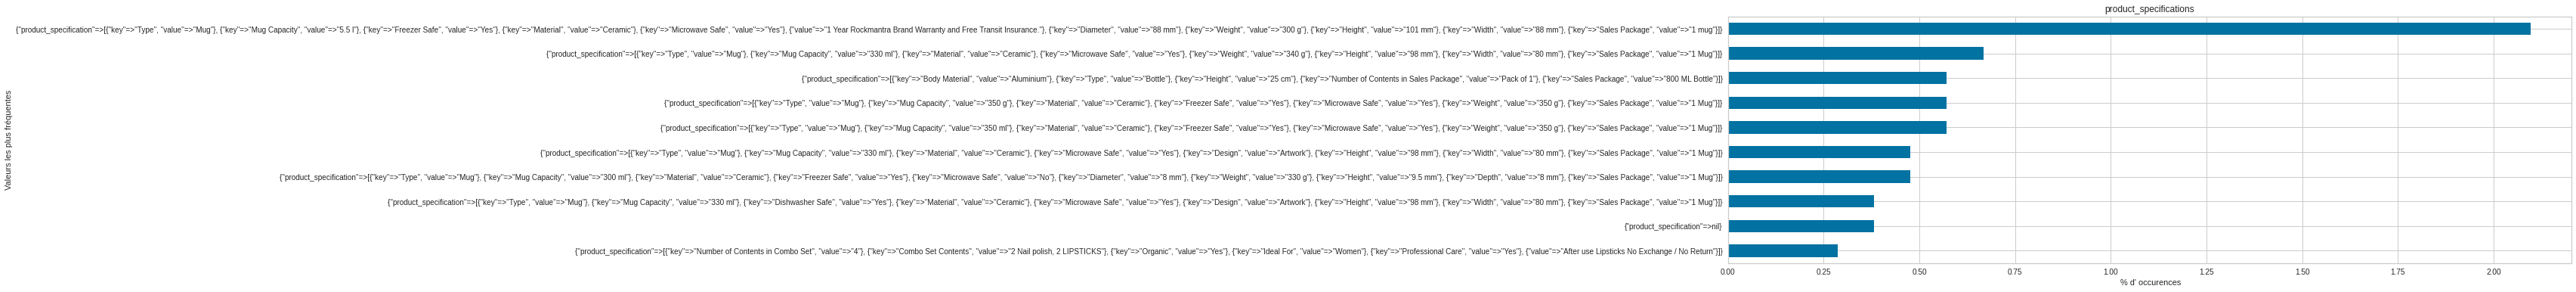

In [99]:
# Affichage des informations essentielles de chaque fichiers
data = dataText
print(f'Le forme du dataframe est {data.shape}')

# Affichage des valeurs manquantes par colonnes en nombre et en ratio
# Initialisation
missingValueNumber = 0
missingValueNumberTotal = 0
missingValuesList = list()

# Boucle de calcul et d'affichage par colonnes
for col in data :
    missingValueNumber = data[col].isna().sum()
    missingValueRatio = missingValueNumber / data[col].size
    print (f'Colonne : {col} : {missingValueNumber} valeurs manquantes, ratio : {round(missingValueRatio,2)}')
    missingValueNumberTotal = missingValueNumberTotal + missingValueNumber
    missingValuesList.append(missingValueRatio)

# Affichage des valeurs manquantes au total en nombre et en ratio
missingValueRatioTotal = missingValueNumberTotal / data.size
print(f'Le data frame comprends {missingValueNumberTotal} valeurs manquantes au total soit un ratio de {round(missingValueRatioTotal,2)}')

# Valeurs les plus fréquentes par colonne
for col in data.columns :
    # Barplot des valeurs les plus fréquentes
    # Comptage
    topValues = data[col].value_counts()/data.shape[0]*100
    # Mise en ordre
    topValues = topValues.sort_values(ascending=True)
    # Graphique à partir des 10 plus élevées
    plt.figure(figsize=(20,6))
    figDescription = topValues.tail(10).plot.barh()
    figDescription.set(xlabel=' % d\' occurences')
    figDescription.set(ylabel='Valeurs les plus fréquentes')
    figDescription.set(title=col)
    plt.show()

In [100]:
# Recherche du nombre de catégories précises
dataText['product_category_tree'].unique().shape

(641,)

L'arborescence des catégories permettra de déterminer un label. En l'état il y a 641 classifications différentes, il va donc falloir les regrouper pour diminuer leur nombre.

Pour effectuer la classification par le texte, nous retiendrons les variables de format string 'description', 'brand' et 'product_name', on concatènera les deux dernières au texte de description. Bien que le nom de produit soit déjà intégré à la description, le concaténer aura tout de même un effet en augmentant sa fréquence dans le texte.

Sur les variables utiles, on ne retrouve de valeurs manquantes que sur la marque des produits ce qui n'est pas anormal. Le manque de cet information n'est pas problématique vu le traitement par lequel on va utiliser cette variable.


## Recherche de labels

In [101]:
# Récupération de la catégorie la plus élevée
dataText['label'] = dataText['product_category_tree']
dataText['label'] = dataText['label'].map(lambda x: x.replace('>',''))
dataText['label'] = dataText['label'].map(lambda x: x.replace('[',''))
dataText['label'] = dataText['label'].map(lambda x: x.replace(']',''))
dataText['label'] = dataText['label'].map(lambda x: x.replace('"',''))
dataText['label'] = dataText['label'].map(lambda x: x.split()[0])
dataText['label'].unique()

# On crée un numéro de classe pour chaque label (pour simplifier certains traitements ultérieurs)
dataText['labelNb'] = dataText['label']

mapping = {'Home': 1, 'Baby': 2, 'Watches': 3, 'Kitchen': 4, 'Beauty': 5, 'Computers': 6}

dataText['labelNb']=dataText['labelNb'].replace({'Home': 1, 'Baby': 2, 'Watches': 3, 'Kitchen': 4, 'Beauty': 5, 'Computers': 6})

Avec six catégories, on a un nombre suffisant pour réaliser une étude de faisabilité.

## Concaténation des textes

In [102]:
# Concaténation des variables 'description', 'brand' et 'product_name'
dataText['brand'].fillna(value='', inplace=True)
dataText['fullText'] = dataText['description']+ ' ' + dataText['brand']+ ' ' + dataText['product_name'].map(str)


In [68]:
#Exemple
dataText['fullText'][1]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Sathiyas Sathiyas Cotton Bath Towel'

## Modélisation de sujets

Modéliser les sujets peut-être une façon de voir si le corpus de texte peut se distinguer en 6 classes sans supervision si on obtient des classes correspondant aux 6 catégories telles que définies au-dessus.

In [69]:
# Création d'une matrice de fréquence
tfVectorizer = feature_extraction.text.CountVectorizer(max_df=0.90, min_df=1, max_features=1000, stop_words='english')
tf = tfVectorizer.fit_transform(dataText['fullText'])

# Calcul des sujets
lda = decomposition.LatentDirichletAllocation(n_components=6, max_iter=5, learning_method='online', learning_offset=50., random_state=42).fit(tf)

# Affichage des sujets
for topicId, topic in enumerate(lda.components_):
  print(f'Topic {topicId} :')
  for i in topic.argsort()[:-10-1:-1]:
    print(tfVectorizer.get_feature_names()[i])

Topic 0 :
cm
sticker
wall
showpiece
home
rs
vinyl
price
wallmantra
box
Topic 1 :
skin
baby
print
set
cotton
pack
specifications
general
features
number
Topic 2 :
laptop
warranty
shapes
mouse
usb
pad
adapter
battery
power
light
Topic 3 :
mug
ceramic
coffee
material
perfect
gift
rockmantra
safe
tea
loved
Topic 4 :
polyester
eyelet
aroma
curtain
comfort
design
door
mugs
brown
usb
Topic 5 :
free
buy
delivery
products
shipping
cash
genuine
rs
30
day


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


On retrouve facilement certaines catégories initialement définies, topic 1 : Baby, topic 2 : Computers, les autres catégories sont plus mélangées et ne se distinguent pas vraiment. Etonnament la catégorie 'Montres' pourtant bien particulière, ne se démarque pas.

## Nettoyage des textes

In [70]:
# Fonction de nettoyage du texte
def cleanText(textEntry):
  specialCharList = [':', ';', '?', '}', ')', '{', '(',',','.','!','/','_']
  for specialChar in specialCharList:
    textEntry=textEntry.replace(specialChar, '')
  textEntry=textEntry.lower()
  return textEntry

In [71]:
# Nettoyage du texte
dataText['fullText'] = dataText['fullText'].apply(cleanText)
#Exemple
dataText['fullText'][1]

'specifications of sathiyas cotton bath towel 3 bath towel red yellow blue bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men women boys girls model id asvtwl322 color red yellow blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towel sathiyas sathiyas cotton bath towel'

In [72]:
# Création des bags of words
dataText['fullText'] = dataText['fullText'].apply(word_tokenize)
#Exemple
dataText['fullText'][1]

['specifications',
 'of',
 'sathiyas',
 'cotton',
 'bath',
 'towel',
 '3',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'features',
 'machine',
 'washable',
 'yes',
 'material',
 'cotton',
 'design',
 'self',
 'design',
 'general',
 'brand',
 'sathiyas',
 'type',
 'bath',
 'towel',
 'gsm',
 '500',
 'model',
 'name',
 'sathiyas',
 'cotton',
 'bath',
 'towel',
 'ideal',
 'for',
 'men',
 'women',
 'boys',
 'girls',
 'model',
 'id',
 'asvtwl322',
 'color',
 'red',
 'yellow',
 'blue',
 'size',
 'mediam',
 'dimensions',
 'length',
 '30',
 'inch',
 'width',
 '60',
 'inch',
 'in',
 'the',
 'box',
 'number',
 'of',
 'contents',
 'in',
 'sales',
 'package',
 '3',
 'sales',
 'package',
 '3',
 'bath',
 'towel',
 'sathiyas',
 'sathiyas',
 'cotton',
 'bath',
 'towel']

<Figure size 1440x432 with 0 Axes>

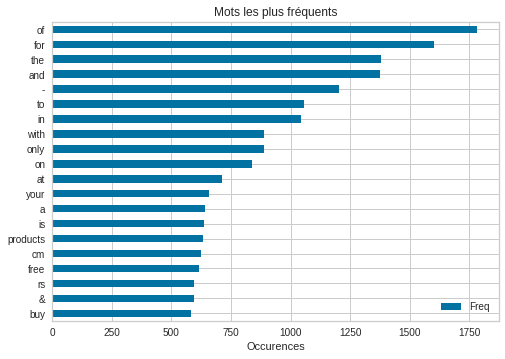

In [73]:
# Définition des stopwords
freq = dict()

# Détermination de la fréquence d'apparition de chaque mots dans chaque annonces
for k, v in dataText['fullText'].iteritems():
  freq[k] = nltk.FreqDist(v)

# Recherche de la fréquence des mots sur l'ensemble du corpus
# Transformation en dataframe et remplissage des Nan par 0
dfWords = pd.DataFrame.from_dict(freq, orient='index')
dfWords.fillna(value=0, inplace=True)

# Somme des fréquences sur tout le corpus
for col in dfWords :
  dfWords[col][0] = dfWords[col].sum()

dfWords.drop(dfWords.index[1:1050],inplace=True)
dfWords = dfWords.transpose()
dfWords.columns = ['Freq']

# Mise en ordre
dfWords = dfWords.sort_values(by='Freq',ascending=True)
# Graphique à partir des 20 plus élevées
plt.figure(figsize=(20,6))
figDescription = dfWords.tail(20).plot.barh()
figDescription.set(xlabel='Occurences')
figDescription.set(title='Mots les plus fréquents')
plt.show()

In [74]:
dfWords.tail(40)

,Freq
from,382.0
features,394.0
online,395.0
mug,396.0
's,413.0
baby,418.0
1,433.0
this,434.0
set,436.0
it,445.0


Du fait de la taille réduite de l'échantillon choisi, on constate que si l'on suit la fréquence d'apparition des mots pour définir les stopwords, on trouve rapidement des mots qui n'en sont pas comme 'watch', 'baby', 'mug' etc... Cela dit, ma fréquence calculée ici permet de définir des stopwords qui ne seraient probablement pas présents dans les ensembles par défaut de la librairie NLTK comme 'products', 'buy', 'replacement', 'genuine' etc... On prendra une liste très réduite de ces mots très fréquents et on l'appuiera avec les stopwords par défaut de NLTK.

In [75]:
# Set de stopwords composé des mots les plus fréquents et d'un ensemble par défaut
stopWords = set()
stopWords.update(tuple(nltk.corpus.stopwords.words('english')))
stopWords.update(['yes','no','specification','specifications','type', 'flipkartcom', 'guarantee', 'online', 'features', 'sale','delivery','id','lenght','inch','dimensions','number','sales',])
print(len(stopWords))
stopWords.update(dfWords.index[6709:6736])
print(len(stopWords))

195
206


In [76]:
# Fonction de retrait des stopWords des bag of words
def cleanSW(bagEntry):
  bagCleaned = list()
  bagCleaned += [w for w in bagEntry if not w in list(stopWords)]
  return bagCleaned

In [77]:
# Retrait des stopWords
dataText['fullText'] = dataText['fullText'].apply(cleanSW)
#Exemple
dataText['fullText'][1]

['sathiyas',
 'cotton',
 'bath',
 'towel',
 '3',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'machine',
 'washable',
 'material',
 'cotton',
 'design',
 'self',
 'design',
 'general',
 'brand',
 'sathiyas',
 'bath',
 'towel',
 'gsm',
 '500',
 'model',
 'name',
 'sathiyas',
 'cotton',
 'bath',
 'towel',
 'ideal',
 'men',
 'women',
 'boys',
 'girls',
 'model',
 'asvtwl322',
 'color',
 'red',
 'yellow',
 'blue',
 'size',
 'mediam',
 'length',
 '30',
 'width',
 '60',
 'box',
 'contents',
 'package',
 '3',
 'package',
 '3',
 'bath',
 'towel',
 'sathiyas',
 'sathiyas',
 'cotton',
 'bath',
 'towel']

In [78]:
# Fonction de lemmatisation
def lemmat(bagEntry):
  lemmatizer = WordNetLemmatizer()
  bagCleaned = list()
  bagCleaned += [lemmatizer.lemmatize(w) for w in bagEntry]
  return bagCleaned

In [79]:
# Lemmatisation des bags of words
dataText['fullText'] = dataText['fullText'].apply(lemmat)
#Exemple
dataText['fullText'][1]

['sathiyas',
 'cotton',
 'bath',
 'towel',
 '3',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'machine',
 'washable',
 'material',
 'cotton',
 'design',
 'self',
 'design',
 'general',
 'brand',
 'sathiyas',
 'bath',
 'towel',
 'gsm',
 '500',
 'model',
 'name',
 'sathiyas',
 'cotton',
 'bath',
 'towel',
 'ideal',
 'men',
 'woman',
 'boy',
 'girl',
 'model',
 'asvtwl322',
 'color',
 'red',
 'yellow',
 'blue',
 'size',
 'mediam',
 'length',
 '30',
 'width',
 '60',
 'box',
 'content',
 'package',
 '3',
 'package',
 '3',
 'bath',
 'towel',
 'sathiyas',
 'sathiyas',
 'cotton',
 'bath',
 'towel']

## Réduction préalable du nombre de variables (non utilisé car inutile vu les temps de calculs)
Pour alléger le nombre de variables et accélérer la classification, on peut retirer les mots les moins utilisés. Sachant qu'il y a 6 classes et en moyenne 175 objets par classes, des mots représentant une très petite part d'une classe paraîssent peu utiles. Il s'agira donc de ne pas conserver les mots dont on sait que leur fréquence est inférieure à 5 occurences.

<Figure size 1440x432 with 0 Axes>

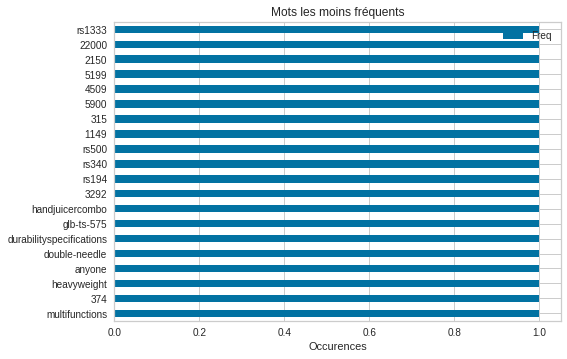

(6198, 1)


In [80]:
# Détermination de la fréquence d'apparition de chaque mots dans chaque annonces
for k, v in dataText['fullText'].iteritems():
  freq[k] = nltk.FreqDist(v)

# Recherche de la fréquence des mots sur l'ensemble du corpus
# Transformation en dataframe et remplissage des Nan par 0
dfWords = pd.DataFrame.from_dict(freq, orient='index')
dfWords.fillna(value=0, inplace=True)

# Somme des fréquences sur tout le corpus
for col in dfWords :
  dfWords[col][0] = dfWords[col].sum()

dfWords.drop(dfWords.index[1:1050],inplace=True)
dfWords = dfWords.transpose()
dfWords.columns = ['Freq']

# Mise en ordre
dfWords = dfWords.sort_values(by='Freq',ascending=False)
# Graphique à partir des 20 moins fréquents
plt.figure(figsize=(20,6))
figDescription = dfWords.tail(20).plot.barh()
figDescription.set(xlabel='Occurences')
figDescription.set(title='Mots les moins fréquents')
plt.show()

print(dfWords.shape)

In [81]:
# Récupération des mots les moins utilisés
dfWords2 = dfWords.query('Freq < 5')
dfWords2.shape

(4323, 1)

# Création de matrices tf-idf
Maintenant que nous avons vu quel process de nettoyage appliquer, nous pouvons l'intégrer au module TfidfVectorizer de scklearn.

In [82]:
# Définition des fonctions de tokenisation et de lemmatisation pour intégration au TfidfVectorizer
lemmatizer = WordNetLemmatizer()
def lemmat(tokens, lemmatizer):
  lemmatized = []
  for item in tokens :
    lemmatized.append(lemmatizer.lemmatize(item))
  return lemmatized

def tokenize(text):
  tokens = nltk.word_tokenize(text)
  lemmatized = lemmat(tokens,lemmatizer)
  return lemmatized

In [83]:
# Re-création du texte
dataText['fullText'] = dataText['description']+ ' ' + dataText['brand']+ ' ' + dataText['product_name'].map(str)
# Nettoyage du texte
dataText['fullText'] = dataText['fullText'].apply(cleanText)

In [84]:
# Vectorisation Tf-idf
tfidf = feature_extraction.text.TfidfVectorizer(tokenizer=tokenize, stop_words=stopWords)
values = tfidf.fit_transform(dataText['fullText'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'dimension', 'doe', 'feature', 'ha', 'might', 'must', "n't", 'need', 'product', 'r', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


# Evaluation de la faisabilité : Classification par le texte
Pour se faire, on va comparer la présence ou non de clusters bien définis et observer leur similarité avec les clusters des labels.

In [ ]:
# Nombre de clusters
nbClusters = 6

# Classification
kM = KMeans(n_clusters=nbClusters, random_state=42)
kM.fit(values)

clusters = kM.labels_
centroids = kM.cluster_centers_


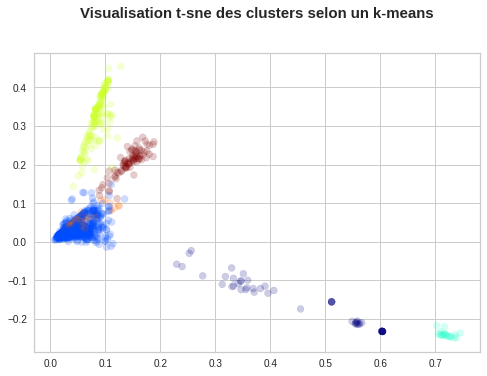

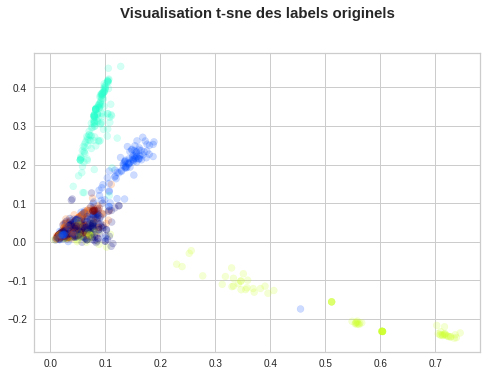

In [ ]:
# Affichage des clusters avec TruncatedSVD (clusters Kmeans)
pca = decomposition.TruncatedSVD(n_components=2, algorithm='arpack')
X_pca = pca.fit_transform(values)
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des clusters selon un k-means', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()
# Affichage des clusters avec TruncatedSVD (clusters d'origine)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dataText['labelNb'].astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des labels originels', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()

A partir de la réduction de dimensions TruncatedSVD, on distingue des regroupements similaires entre les clusters calculés et les labels d'origine mais une partie est difficilement lisible. On peut densifier les vecteurs pour effectuer une réduction de dimension t-sne.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


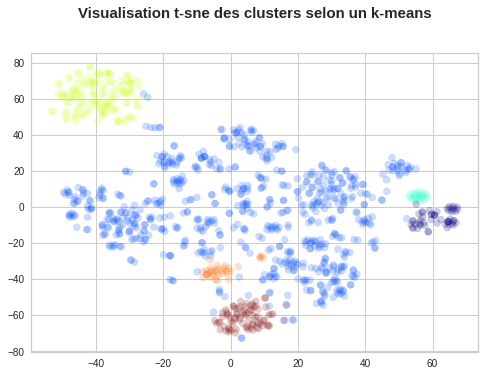

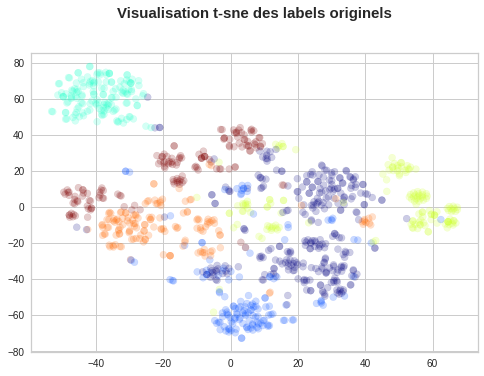

ARI :  0.23116176913684017


In [ ]:
# Affichage des clusters avec t-sne(clusters Kmeans)
pca = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
# La matrice est complétée avec la méthode todense() pour pouvoir être traitée par t-sne
X_pca = pca.fit_transform(values.todense())
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des clusters selon un k-means', fontsize = 15, pad = 35, fontweight = 'bold')

plt.show()

# Affichage des clusters avec t-sne (clusters d'origine)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dataText['labelNb'].astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des labels originels', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()



print("ARI : ", metrics.adjusted_rand_score(dataText['label'], clusters))

Un certain nombre de clusters se distinguent très bien alors que d'autres se recouvrent. Certains labels seront plus simples à prédire que d'autres. Nous allons essayer de re-calculer un k-means après la réduction de dimension. En l'état on a un ARI de 0.30 ce qui n'est pas très performant mais est tout de même éloigné d'une classification aléatoire.

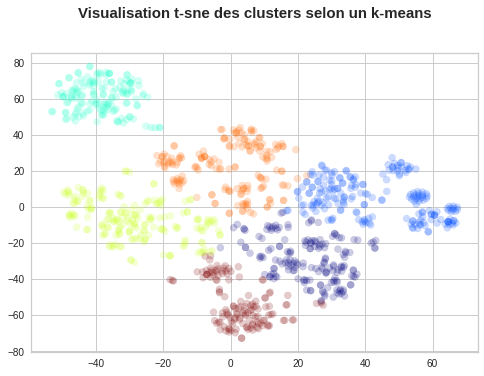

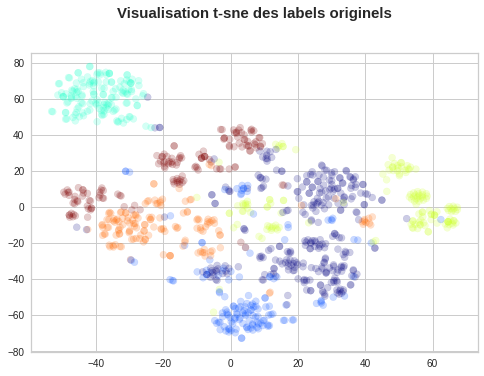

ARI :  0.4436406302180116


In [ ]:
# Classification KMeans sur les variables t-sne
kM = KMeans(n_clusters=nbClusters, random_state=42)
kM.fit(X_pca)

clusters = kM.labels_
centroids = kM.cluster_centers_

# La matrice est complétée avec la méthode todense() pour pouvoir être traitée par t-sne
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des clusters selon un k-means', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()
# Affichage des clusters avec t-sne (clusters d'origine)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dataText['labelNb'].astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des labels originels', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()

print("ARI : ", metrics.adjusted_rand_score(dataText['label'], clusters))

Les classes se distinguent mieux même si encore une fois, certaines classes sont mieux séparées que d'autres. L'ARI est loin d'être catastrophique élevé ce qui est plutôt encourageant pour une correspondance avec une classification non supervisée, avec un peu d'optimisation, on pourrait atteindre probablement plus élevé. La classification par le texte seule présente donc des résultats encourageants et va dans le sens d'une possible faisabilité.

## Essai de classification Random Forest

In [ ]:
#Définition des X et y
X = values
y = dataText['labelNb'].values

#Séparation des jeux de données train et test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42) # 30% des données dans le jeu de test

start = time.time()

# Paramètres à tester sur la GridSearch avec validation croisée
# Pour recalculer en entier le notebook plus rapidement, certains paramètres ont été écartés à posteriori
#paramGrid = {'loss':['deviance'],'max_depth': [3, 4, 5], 'learning_rate':[0.05,0.1,0.2] ,  'n_estimators':[50,100,500,1000], 'random_state':[42] }
paramGrid = {'loss':['deviance'],'max_depth': [4], 'learning_rate':[0.05] ,  'n_estimators':[1000], 'random_state':[42] }
target = 'accuracy'
# Recherche d'hyperparamètre par validation croisée
rfg = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), paramGrid, cv=5, scoring=target)

# Entrainement
rfg.fit(X_train, y_train)

# Meilleurs paramètres
print(rfg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(rfg.cv_results_['mean_test_score'], rfg.cv_results_['std_test_score'],  rfg.cv_results_['params']):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(target,mean,std,params))

end = time.time()
print(f"Traité en {end-start} secondes")

{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 1000, 'random_state': 42}
Résultats de la validation croisée :
accuracy = 0.895 (+/-0.012) for {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 1000, 'random_state': 42}
Traité en 369.0024845600128 secondes


In [ ]:
# Classifieur Random Forest Gradient Boosting optimal
rfgT = ensemble.GradientBoostingClassifier(loss='deviance',max_depth=4, learning_rate=0.05, n_estimators=1000, random_state=42)

# Entrainement
start = time.time() 
rfgT.fit(X_train, y_train)
end =time.time()
timeTrRfgT = end - start

# Prédiction
start = time.time() 
y_pred_rfgT = rfgT.predict(X_test)
end = time.time()
timeRfgT = end - start

#Prédiction sur le training set
y_pred_rfgT_train = rfgT.predict(X_train)
accRfgTTrain = np.sqrt(metrics.accuracy_score(y_train, y_pred_rfgT_train))
print("Accuracy Train : {:.3f}".format(accRfgTTrain))

# Calcul des métriques d'évaluation
accRfgT = np.sqrt(metrics.accuracy_score(y_test, y_pred_rfgT))
print("Accuracy: {:.3f}".format(accRfgT))
print("Time: {:.2f}".format(timeRfgT))
print("TrainingTime: {:.2f}".format(timeTrRfgT))

metrics.classification_report(y_true=y_test, y_pred=y_pred_rfgT)

Accuracy Train : 1.000
Accuracy: 0.963
Time: 0.06
TrainingTime: 70.96


'              precision    recall  f1-score   support\n\n           1       0.83      1.00      0.91        96\n           2       0.95      0.82      0.88        45\n           3       1.00      1.00      1.00        50\n           4       1.00      0.86      0.93        37\n           5       0.97      0.87      0.92        39\n           6       1.00      0.90      0.95        48\n\n    accuracy                           0.93       315\n   macro avg       0.96      0.91      0.93       315\nweighted avg       0.94      0.93      0.93       315\n'

# Exploration et préparation du jeu de données graphiques
## Détermination des descripteurs SIFT

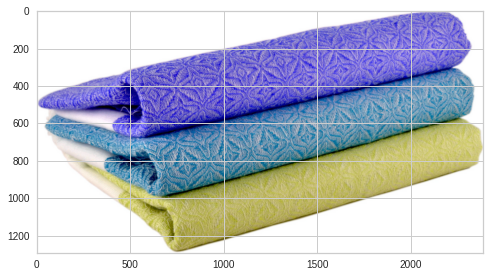

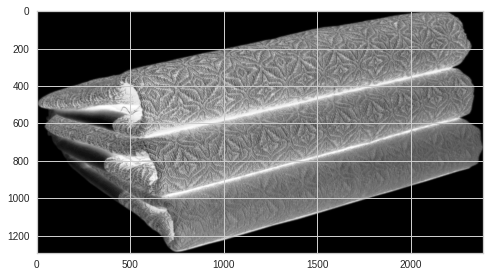

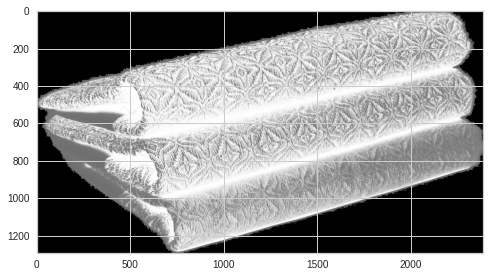

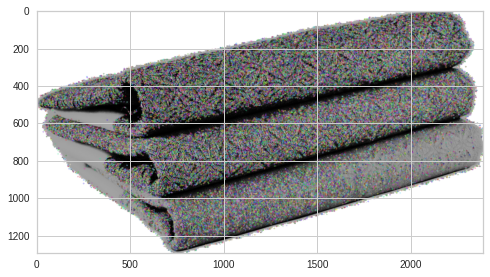

In [ ]:
# Démonstration du traitement de l'image
# Affichage de l'image du premier produit sans modification
image = cv2.imread(path+dataText['image'][1], -1)
plt.imshow(image)
plt.show()

# Image en niveau de gris
imageG = cv2.imread(path+dataText['image'][1], 0)
plt.imshow(imageG)
plt.show()

# Image égalisée
imageGE = cv2.equalizeHist(imageG)
plt.imshow(imageGE)
plt.show()

# Descripteurs
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(imageGE, None)
imageDes = cv2.drawKeypoints(imageGE,kp,imageGE)
plt.imshow(imageDes)
plt.show()

In [85]:
# Initialisation (le nombre de descripteurs est limité à 500 par images)
siftDescriptors = []
sift = cv2.SIFT_create()#nfeatures=500,)
path = "/gdrive/My Drive/Data/p6data/Images/"
listImg = [fileName for fileName in dataText['image']]
start = time.time()

# Pour chaque produit, on converti l'image en niveaux de gris et on égalise

for imgNb in range(len(listImg)) :
  if imgNb%100 == 0 : print(imgNb) # Comptage des opérations effectuées
  image = cv2.imread(path+listImg[imgNb], 0)
  res = cv2.equalizeHist(image)
  kp, des = sift.detectAndCompute(res, None)
  siftDescriptors.append(des)

# Création d'une liste de descripteurs par image
siftDes = np.asarray(siftDescriptors)

# Création d'une liste de descripteurs pour toutes les images
siftDesAll = np.concatenate(siftDes, axis=0)

end = time.time()
print(f"Traité en {end-start} secondes")

0
100
200
300
400
500
600
700
800
900
1000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Traité en 1363.6862432956696 secondes


## Création des clusters de descripteurs avec MiniBatchKMeans

In [86]:
# Pour déterminer le nombre de clusters, on va utiliser la règle de la racine carrée du nombre de descripteurs
k = int(round(np.sqrt(len(siftDesAll)),0))
start = time.time()

# Clustering
clusterSift = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=42)
clusterSift.fit(siftDesAll)

end = time.time()
print(f"{k} clusters traités en {end-start} secondes")

3007 clusters traités en 710.1291038990021 secondes


# Matrice des histogrammes

In [87]:
start = time.time()

# Matrice des histogrammes
histVectors = []

# Calcul de l'histogramme par image
for imageNb, imageDes in enumerate(siftDes) :
  res = clusterSift.predict(imageDes)
  hist = np.zeros(len(clusterSift.cluster_centers_))
  nbDes = len(imageDes)
  for imageNb in res :
    hist[imageNb] += 1.0/nbDes
  # Remise dans l'ensemble
  histVectors.append(hist)

imageFeatures = np.asarray(histVectors)

end = time.time()
print(f"Traité en {end-start} secondes")
print(imageFeatures.shape)
  

Traité en 178.97757840156555 secondes
(1049, 3007)


## Réduction de dimension PCA
Pour améliorer les temps de calcul, on va réduire les dimensions via une simple PCA linéaire tout en conservant au moins 99% de variance expliquée pour ne pas perdre de données. Le but étant de rassembler les variables très corrêlées pour en réduire le nombre avec une pêrte d'information très minime.

In [88]:
# Initialisation de l'analyse par composantes principales
pca = decomposition.PCA(n_components=0.99)

featPCA = pca.fit_transform(imageFeatures)
print(featPCA.shape)

(1049, 743)


En conservant 99% de variance expliquée, on peut passer de 719 variables à 506.

# Evaluation de la faisabilité : Classification par l'image
Pour se faire, on va comparer la présence ou non de clusters bien définis et observer leur similarité avec les clusters des labels.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


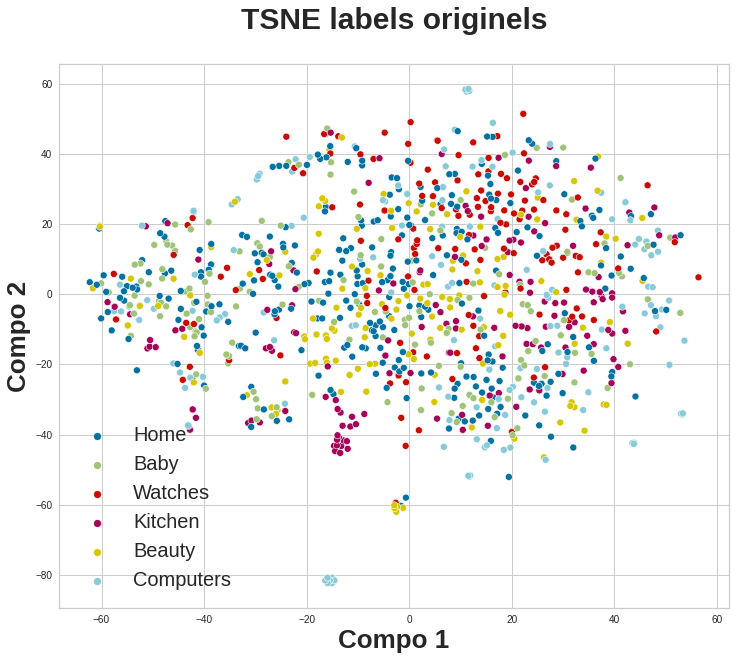

In [ ]:
# Réduction de dimension t-sne
tsne = manifold.TSNE(n_components=2, perplexity=10, n_iter=5000, init='random', random_state=42)
XTsne = tsne.fit_transform(featPCA)

# On stocke les résultats dans un nouveau dataframe
dfTsne = pd.DataFrame(XTsne[:,0:2], columns=['Composante 1', 'Composante 2'])
# Une colonne récupère les labels d'origine
dfTsne["class"] = dataText["label"]

# Représentation graphique
plt.figure(figsize=(12,10))
sns.scatterplot(x='Composante 1', y='Composante 2', hue="class", data=dfTsne, legend="brief", cmap = 'jet')
plt.title('TSNE labels originels', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('Compo 1', fontsize = 26, fontweight = 'bold')
plt.ylabel('Compo 2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 20}) 

plt.show()

## Classification k-means

ARI :  0.045084084557800615


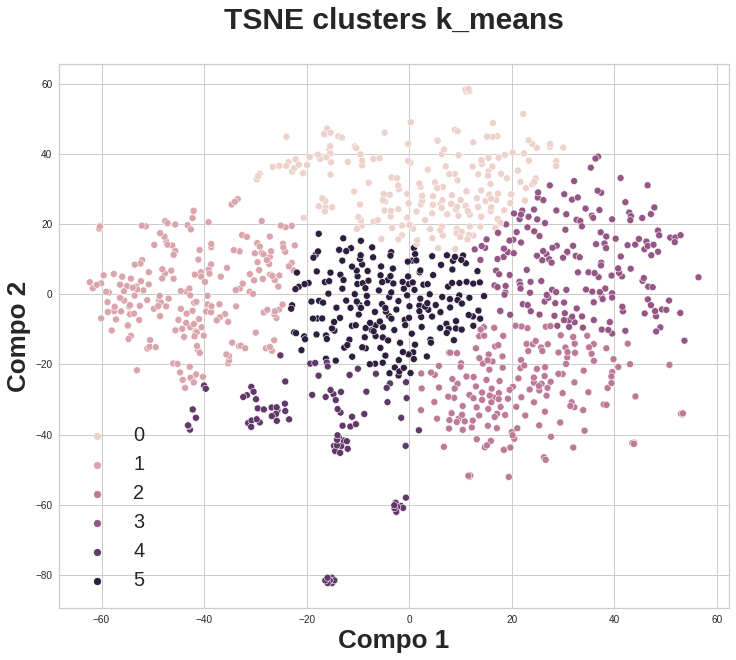

In [ ]:
# Classification KMeans sur les variables t-sne
kM = KMeans(n_clusters=nbClusters, random_state=42)
kM.fit(XTsne)

dfTsne['clusters'] = kM.labels_
centroids = kM.cluster_centers_

# Représentation graphique
plt.figure(figsize=(12,10))
sns.scatterplot(x='Composante 1', y='Composante 2', hue="clusters", data=dfTsne, legend="brief", cmap = 'jet')
plt.title('TSNE clusters k_means', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('Compo 1', fontsize = 26, fontweight = 'bold')
plt.ylabel('Compo 2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 20}) 

print("ARI : ", metrics.adjusted_rand_score(dataText['label'], dfTsne['clusters']))

L'ARI est très très faible

## Essai de classification Random Forest

In [ ]:
#Définition des X et y
X = imageFeatures
y = dataText['labelNb'].values

#Séparation des jeux de données train et test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42) # 30% des données dans le jeu de test

start = time.time()

# Paramètres à tester sur la GridSearch avec validation croisée
# Pour recalculer en entier le notebook plus rapidement, certains paramètres ont été écartés à posteriori
paramGrid = {'loss':['deviance'],'max_depth': [4], 'learning_rate':[0.05] ,  'n_estimators':[500], 'random_state':[42] }

# Recherche d'hyperparamètre par validation croisée
rfg = model_selection.GridSearchCV(ensemble.GradientBoostingClassifier(), paramGrid, cv=5, scoring=target)

# Entrainement
rfg.fit(X_train, y_train)

# Meilleurs paramètres
print(rfg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(rfg.cv_results_['mean_test_score'], rfg.cv_results_['std_test_score'],  rfg.cv_results_['params']):
    print("{} = {:.3f} (+/-{:.03f}) for {}".format(target,mean,std,params))

end = time.time()
print(f"Traité en {end-start} secondes")

{'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 500, 'random_state': 42}
Résultats de la validation croisée :
accuracy = 0.504 (+/-0.032) for {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 500, 'random_state': 42}
Traité en 7454.250442504883 secondes


In [ ]:
# Classifieur Random Forest Gradient Boosting optimal
rfgI = ensemble.GradientBoostingClassifier(loss='deviance',max_depth=4, learning_rate=0.05, n_estimators=500, random_state=42)

# Entrainement
start = time.time() 
rfgI.fit(X_train, y_train)
end =time.time()
timeTrRfgI = end - start

# Prédiction
start = time.time() 
y_pred_rfgI = rfgI.predict(X_test)
end = time.time()
timeRfgI = end - start

#Prédiction sur le training set
y_pred_rfgI_train = rfgI.predict(X_train)
accRfgITrain = np.sqrt(metrics.accuracy_score(y_train, y_pred_rfgI_train))
print("Accuracy Train : {:.3f}".format(accRfgITrain))

# Calcul des métriques d'évaluation
accRfgI = np.sqrt(metrics.accuracy_score(y_test, y_pred_rfgI))
print("Accuracy: {:.3f}".format(accRfgI))
print("Time: {:.2f}".format(timeRfgI))
print("TrainingTime: {:.2f}".format(timeTrRfgI))

metrics.classification_report(y_true=y_test, y_pred=y_pred_rfgI)

Accuracy Train : 1.000
Accuracy: 0.695
Time: 0.04
TrainingTime: 1588.52


'              precision    recall  f1-score   support\n\n           1       0.56      0.75      0.64        96\n           2       0.40      0.22      0.29        45\n           3       0.58      0.36      0.44        50\n           4       0.29      0.27      0.28        37\n           5       0.39      0.56      0.46        39\n           6       0.49      0.42      0.45        48\n\n    accuracy                           0.48       315\n   macro avg       0.45      0.43      0.43       315\nweighted avg       0.48      0.48      0.47       315\n'

# Mise en commun des deux types de variables

In [ ]:
# Construction d'un dataframe incuant les deux types de variables
dfTxt = pd.DataFrame(data=values.toarray())
dfImg = pd.DataFrame(data=featPCA)
dataFinal = dfTxt.join(dfImg, rsuffix='Img')
dataFinal.head()
dataFinal.to_csv('dataCleanP6.csv', index = False)

In [ ]:
# Classification
kM = KMeans(n_clusters=nbClusters, random_state=42)
kM.fit(dataFinal.values)

clusters = kM.labels_
centroids = kM.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


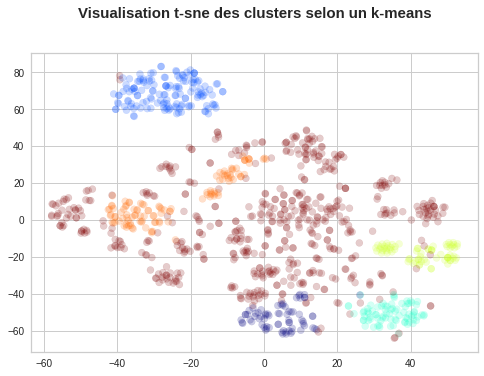

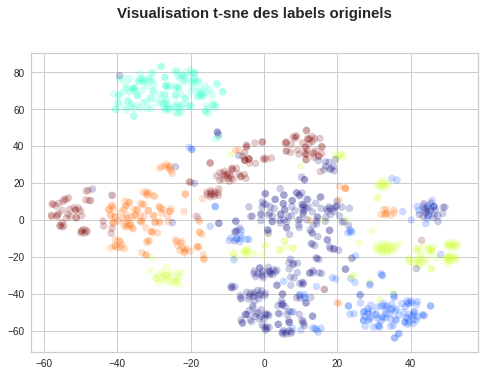

ARI :  0.27402626279253994


In [ ]:
# Affichage des clusters avec t-sne(clusters Kmeans)
pca = manifold.TSNE(n_components=2, perplexity=30, n_iter=5000, init='pca')
# La matrice est complétée avec la méthode todense() pour pouvoir être traitée par t-sne
X_pca = pca.fit_transform(values.todense())
plt.scatter(X_pca[:,0],X_pca[:,1],c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des clusters selon un k-means', fontsize = 15, pad = 35, fontweight = 'bold')

plt.show()
# Affichage des clusters avec t-sne (clusters d'origine)
plt.scatter(X_pca[:,0],X_pca[:,1],c=dataText['labelNb'].astype(np.float), cmap = 'jet', alpha=.2)
plt.title('Visualisation t-sne des labels originels', fontsize = 15, pad = 35, fontweight = 'bold')
plt.show()

print("ARI : ", metrics.adjusted_rand_score(dataText['label'], clusters))

La visualisation montre que certains clusters se démarquent facilement là où d'autres sont encore confondus. L'ajout des données issues des images réduit l'ARI obtenu avec les données issues du texte seules. Cela entérine la faiblesse du modèle SIFT dans ce cas précis.

# Conclusion
La classification apparaît faisable au regard des performances sur la classification par le texte. La création de descripteurs de l'image par la méthode SIFT est cependant inefficace et ne permet pas d'améliorer les performances de la classification par le texte.

Des améliorations restent possibles : algorithme de word-embedding ou BERT pour le texte, utilisation d'un modèle CNN pour l'image. Ces deux modèles ne pourront cependant pas se contenter d'un aussi petit échantillon pour être entrainé entièrement, on peut approcher ce problème par deux solutions. Il faudra soit les entrainer avec des données issues d'une population plus large, en récupérant des données sur d'autres sites marchands par exemple. Cela donnera un modèle plus spécialisé sur notre tâche mais demande beaucoup de ressources et de temps. La deuxième solution cohnsiste à utiliser le transfert learning, des modèles pré-entraînés. Cela donne des modèles moins spécialisés mais ne nécessite pas de travail supplémentaire.

Au vu de la faisabilité, il faut noter que le projet de classification devra tenir compte de certaines problématiques que ne rencontre pas la faisabilité : à grande échelle, la réduction de dimension sera une préoccupation centrale. On peut également se demander si classer des ensembles très diversifiés (tels que 'home') ne sera pas plus difficile que des ensembles plus spécifiques (ex : 'mugs')